# YGOB Data Exploration




### Import required packages

In [1]:
import functions as f
import pandas as pd
import matplotlib.pyplot
from importlib import reload
from copy import deepcopy
reload(f);


### Read in associated files

In [8]:
Anc=f.import_ancestor('../DATA/species_genome_tabs/Anc_genome.txt')
Cglabrata=f.import_species('../DATA/species_genome_tabs/Cglabrata_genome.txt',"Cglabrata")
Ecymbalariae=f.import_species('../DATA/species_genome_tabs/Ecymbalariae_genome.txt',"Ecymbalariae")
Egossypii=f.import_species('../DATA/species_genome_tabs/Egossypii_genome.txt',"Egossypii")
Kafricana=f.import_species('../DATA/species_genome_tabs/Kafricana_genome.txt',"Kafricana")
Klactis=f.import_species('../DATA/species_genome_tabs/Klactis_genome.txt',"Klactis")
Knaganishii=f.import_species('../DATA/species_genome_tabs/Knaganishii_genome.txt',"Knaganishii")
Lkluyveri=f.import_species('../DATA/species_genome_tabs/Lkluyveri_genome.txt',"Lkluyveri")
Lthermotolerans=f.import_species('../DATA/species_genome_tabs/Lthermotolerans_genome.txt',"Lthermotolerans")
Lwaltii=f.import_species('../DATA/species_genome_tabs/Lwaltii_genome.txt',"Lwaltii")
Ncastellii=f.import_species('../DATA/species_genome_tabs/Ncastellii_genome.txt',"Ncastellii")
Ndairenensis=f.import_species('../DATA/species_genome_tabs/Ndairenensis_genome.txt',"Ndairenensis")
Scerevisiae=f.import_species('../DATA/species_genome_tabs/Scerevisiae_genome.txt',"Scerevisiae")
Skudriavzevii=f.import_species('../DATA/species_genome_tabs/Skudriavzevii_genome.txt',"Skudriavzevii")
Smikitae=f.import_species('../DATA/species_genome_tabs/Smikatae_genome.txt',"Smikitae")
Suvarum=f.import_species('../DATA/species_genome_tabs/Smikatae_genome.txt',"Suvarum")
Tblattae=f.import_species('../DATA/species_genome_tabs/Tblattae_genome.txt',"Tblattae")
Tdelbrueckii=f.import_species('../DATA/species_genome_tabs/Tdelbrueckii_genome.txt',"Tdelbrueckii")
Tphaffii=f.import_species('../DATA/species_genome_tabs/Tphaffii_genome.txt',"Tphaffii")
Vpolyspora=f.import_species('../DATA/species_genome_tabs/Vpolyspora_genome.txt',"Vpolyspora")
Zrouxii=f.import_species('../DATA/species_genome_tabs/Zrouxii_genome.txt',"Zrouxii")




The species variables are a dictionary of dictionaries where each the keys in the main dictionary are "name" and each gene. The name value is the name of the species and the gene dictionaries have keys dir, start, end, whcih hold the direction, and start and end coordinates.

In [13]:
pillars=f.pillar_filter('../DATA/pillars.txt','../DATA/AA_genes.txt')

In [14]:
species=[Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastellii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii]
species_keep=[Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastellii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii]
specie_names=[]
specie_keep_names=[]
for specie in species: specie_names.append(specie['name'])
for specie in species_keep: specie_keep_names.append(specie['name'])

The following is used to filter out a sublist of species we want to keep

In [15]:
inter=deepcopy(species_keep)
for i in range(len(inter)-1,-1,-1): 
    if inter[i]['name'] in ["Vpolyspora","Suvarum","Smikitae","Skudriavzevii","Lwaltii"]:
        del species_keep[i]
        del specie_keep_names[i]
del(inter)

pillars_keep=f.pillar_resort(species_keep,pillars)

In [16]:
print(len(pillars_keep))

9746


General information that may be helpful to get a rough idea of the data size

In [17]:
count=0
for i in species: 
    count=count+len(i)-1
print("The number of total genes is:",count)
print("The number of species is:",len(species))
print("The total number of families is:",len(pillars))
new = {key: pillars[key]  for key in pillars.keys() if len(pillars[key]['genes'])>1}
print("The number of families with a single gene/number of genes with no ohnologs is:", len(pillars)-len(new))

The number of total genes is: 120415
The number of species is: 20
The total number of families is: 12597
The number of families with a single gene/number of genes with no ohnologs is: 6939


## General species info

We can see in the following two plots the distribution of family sizes. The second plot has the singular families, those with only one gene, removed for a better view of the distribution of the other sizes.

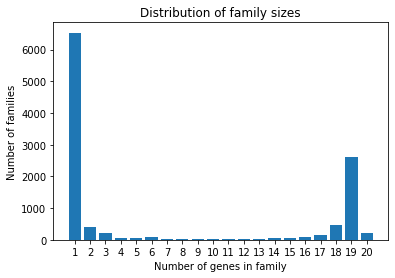

In [18]:
fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),f.family_lengths(f.pillar_resort(species,pillars)))
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of family sizes");

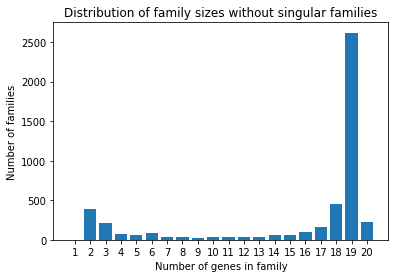

In [19]:
new=f.pillar_resort(species,pillars,2)
lengths=f.family_lengths(new)


fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),lengths)
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of family sizes without singular families");

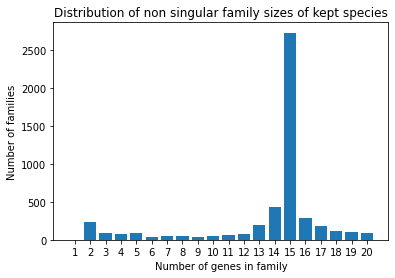

In [20]:
new = f.pillar_resort(species_keep,pillars,2)
lengths=f.family_lengths(new)

fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),lengths)
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of non singular family sizes of kept species");

In [21]:
print(len(f.pillar_resort(species,pillars,15)))
print(len(f.pillar_resort(species_keep,pillars,15)))

4489
3762


The following plot shows the fragmentation, number of different segments (chromosome/contig/scaffolds).

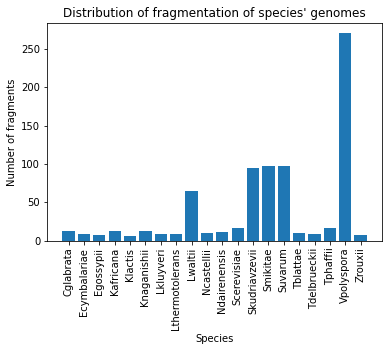

In [22]:
fragmentation=f.species_fragmentation(species)

fig, ax=matplotlib.pyplot.subplots()

matplotlib.pyplot.xticks(rotation=90)

bar=ax.bar(list(range(len(species))),fragmentation,tick_label=specie_names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of fragments");
ax.set_title("Distribution of fragmentation of species' genomes");


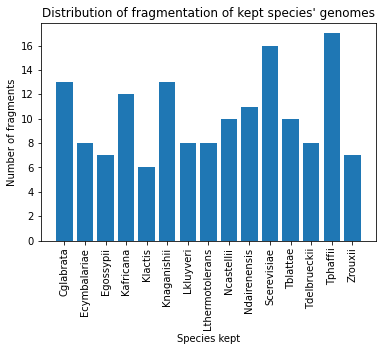

In [23]:
fragmentation=f.species_fragmentation(species_keep)

fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(species_keep))),fragmentation,tick_label=specie_keep_names)
ax.set_xlabel("Species kept");
ax.set_ylabel("Number of fragments");
ax.set_title("Distribution of fragmentation of kept species' genomes");

The following plot shows for each specie the number of non singular families that contain a gene from the given specie.

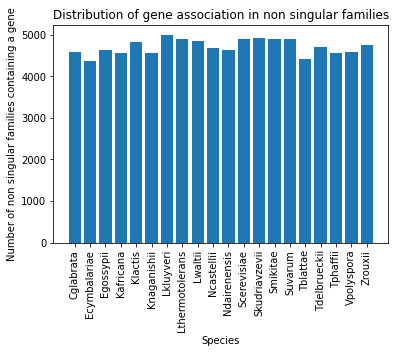

In [24]:
associations=f.species_associations(species,pillars)

fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(species))),associations,tick_label=specie_names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of non singular families containing a gene");
ax.set_title("Distribution of gene association in non singular families");




## Info on species pairs

The following plot shows how many gene pairs each specie has with Saccharomyces Cerevisia.

Pairs are counted as the number of families with a gene from each species, if there are two copies from each then that is counted as 2 families and same for 3 and so on. If there is only 1 gene from one specie and 2 from the other in the family this only counts as one pair. 

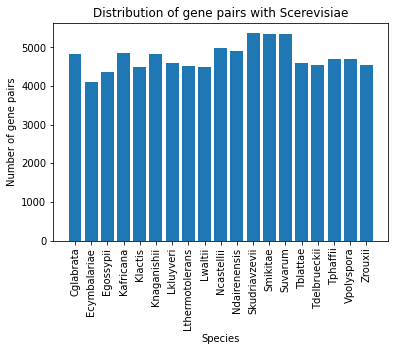

In [25]:
new=deepcopy(species)
new.pop(specie_names.index("Scerevisiae"))
Scer_matches=[f.species_pairs(x,Scerevisiae,pillars) for x in new]
names=deepcopy(specie_names)
ind=specie_names.index("Scerevisiae")
names.pop(ind)


fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(names))),Scer_matches,tick_label=names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of gene pairs");
ax.set_title("Distribution of gene pairs with Scerevisiae");




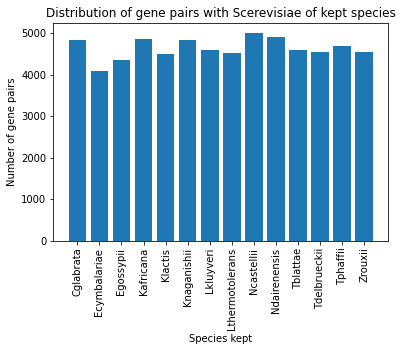

In [26]:
new=deepcopy(species_keep)
new.pop(specie_keep_names.index("Scerevisiae"))
Scer_matches=[f.species_pairs(x,Scerevisiae,pillars) for x in new]
names=deepcopy(specie_keep_names)
ind=specie_keep_names.index("Scerevisiae")
names.pop(ind)


fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(names))),Scer_matches,tick_label=names)
ax.set_xlabel("Species kept");
ax.set_ylabel("Number of gene pairs");
ax.set_title("Distribution of gene pairs with Scerevisiae of kept species");


### Matches Table
The following table shows the number of families in which both species have a gene, in the case that a family has two genes from each species this is counted as two families seeing as when families are reconcilled they will end up as two distinct families. When we have the same species the value represents the number of families in which we have more than one gene from the associated species.

In [27]:
data = f.match_matrix(species,pillars)
 
df = pd.DataFrame(data, index=specie_names)
 
df

,Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastellii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii
Cglabrata,393,4041,4303,4704,4434,4701,4505,4439,4406,4789,4731,4843,4830,4831,4831,4527,4466,4618,4609,4468
Ecymbalariae,4041,0,4272,4010,4190,4012,4270,4186,4145,4069,4042,4094,4085,4086,4086,3953,4115,4034,4036,4137
Egossypii,4303,4272,0,4264,4458,4270,4551,4468,4415,4332,4299,4358,4348,4351,4351,4207,4386,4298,4297,4409
Kafricana,4704,4010,4264,504,4396,4824,4477,4401,4360,4861,4806,4849,4833,4843,4843,4521,4431,4599,4600,4433
Klactis,4434,4190,4458,4396,0,4417,4737,4639,4606,4478,4428,4501,4481,4488,4488,4309,4532,4412,4424,4564
Knaganishii,4701,4012,4270,4824,4417,457,4493,4420,4378,4871,4802,4835,4817,4830,4830,4499,4445,4593,4584,4449
Lkluyveri,4505,4270,4551,4477,4737,4493,0,4787,4724,4560,4512,4597,4583,4588,4588,4381,4647,4497,4506,4677
Lthermotolerans,4439,4186,4468,4401,4639,4420,4787,0,4794,4488,4439,4527,4510,4515,4515,4315,4578,4429,4436,4599
Lwaltii,4406,4145,4415,4360,4606,4378,4724,4794,0,4444,4396,4490,4476,4475,4475,4277,4532,4388,4392,4552
Ncastellii,4789,4069,4332,4861,4478,4871,4560,4488,4444,596,5108,4990,4962,4970,4970,4595,4507,4683,4693,4512


The following graph allows us to see how the total number of genes kept from kept species varies based on the minimum size of families we decide to keep.

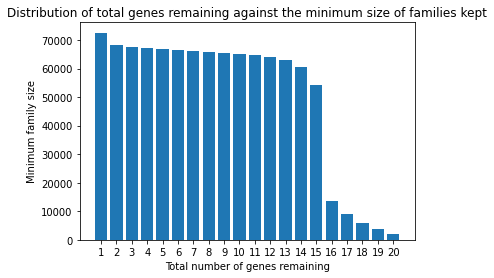

In [28]:
all_keep_genes=f.pillar_resort(species_keep,pillars,1)
lengths=f.family_lengths(all_keep_genes)
remaining_genes=[0]*20
for i in range(1,21):
    remaining_genes[i-1]=sum(j*lengths[j-1] for j in range(i,21))

fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),remaining_genes)
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Total number of genes remaining");
ax.set_ylabel("Minimum family size");
ax.set_title("Distribution of total genes remaining against the minimum size of families kept");




## Family selection

From the above plot we notice that the impact of not including families with few genes does not make much of an impact until we start to reach family sizes of around 16. Seeing as we clearly wish to keep more families than just the 4 largest and do not wish to make an arbitrary choice of size, we decided to keep all families with 3 or more genes.

## Specie selection
From all these observations we notice that other than the five highly fragmented species all others are all well constructed with similar amounts of genes in families and matches with others. See a list of the good species bellow.

In [29]:
print(specie_keep_names)

['Cglabrata', 'Ecymbalariae', 'Egossypii', 'Kafricana', 'Klactis', 'Knaganishii', 'Lkluyveri', 'Lthermotolerans', 'Ncastellii', 'Ndairenensis', 'Scerevisiae', 'Tblattae', 'Tdelbrueckii', 'Tphaffii', 'Zrouxii']


In [30]:
f.gene_species_mapping(species_keep)

'Done'